# `PostgreSQL to Python: Extract  | Seaborn `

**<font color=red>Mr Fugu Data Science</font>**

# (◕‿◕✿)

[Github](https://github.com/MrFuguDataScience) | [Youtube](https://www.youtube.com/channel/UCbni-TDI-Ub8VlGaP8HLTNw/)

# Outcome:

+ Create a table with (*extract*)
+ Bar Plot with Seaborn

# Purpose: 
+ This video will aid in gaining skills creating a table without excel.
+ Generate a nested Bar Plot with Seaborn, evaluating sales by month and year

<font color=red>To create your `init` file and `config` file go to [my github example](https://github.com/MrFuguDataScience/SendDataFrom-R-Python-to-SQL-PSQL-Mongo/blob/master/HOW%20TO%20SEND%20DATA%20from%20Python%20to%20PSQL.ipynb) this is used for login and hide your credentials.</font>

`------------------------------------`

If you do not want to create `init` or `config` files: do something similar to this

`import psycopg2
conn = psycopg2.connect("dbname=test user=postgres") #Connect to an existing database
cur = conn.cursor() #Open a cursor to perform database operations`

`---------------------------------`

In [32]:
import psycopg2             # python->psql connection

import pandas as pd         # create dataframes 
import calendar             # convert int to month
import matplotlib.pyplot as plt  # barchar plot
import seaborn as sns

# Import the 'config' function from the config_user_dta.py file:
from config_user_dta import config

In [33]:
# Get the config params
params_ = config()

# Connect to the Postgres_DB:
conn = psycopg2.connect(**params_)

# Create new_cursor allowing us to write Python to execute PSQL:
cur = conn.cursor()

conn.autocommit = True  # read documentation understanding when to Use & NOT use (TRUE)

In [42]:
fake_ppl=pd.read_csv('noIndx.csv')
fake_ppl.head()

,credit_card,email,first_name,last_name,primary_phone_number
0,5399-3484-4724-7187,gso@qiegan.sqe,Donyell Ann,Ospina,5219459148
1,1630-5261-6108-7631,xnji@gfruaxqnvm.fha,Bishop,Siyed,4164254716
2,4435-3866-1076-3595,dvyco@tkzhsop.zxg,Connor,Powers,3627413915
3,3489-7099-9906-8660,fy@uvfhplatmz.cam,Kylie,Her,3562764561
4,8631-4500-5666-1510,rztkvliou@dkeinhgysf.deo,Anthony,Vo,7345795348


In [35]:
# Fake CPU Purchases:

pd.read_csv('cpu_purchase.csv').head()

,credit_card,cpu,purchase_date
0,5399-3484-4724-7187,Intel Core i1-7554K,2019-10-31
1,1630-5261-6108-7631,AMD Ryzen 1 5827X,2017-07-16
2,4435-3866-1076-3595,Intel Core i5-9457K,2019-03-24
3,3489-7099-9906-8660,AMD Ryzen 4 3401X,2019-06-15
4,8631-4500-5666-1510,Intel Core i6-7283K,2019-11-11


# Extract:
+ This will take the date information we request (month,year)

`----------------------`
+ First Look at what our data consists of as a reminder.

In [36]:
sql_="SELECT * FROM  ppl_cpu_purchases LIMIT 2"
cur.execute(sql_)
cur.fetchall()

[('5399-3484-4724-7187',
  'gso@qiegan.sqe',
  'Donyell Ann',
  'Ospina',
  '5219459148',
  'Intel Core i1-7554K',
  datetime.date(2019, 10, 31)),
 ('1630-5261-6108-7631',
  'xnji@gfruaxqnvm.fha',
  'Bishop',
  'Siyed',
  '4164254716',
  'AMD Ryzen 1 5827X',
  datetime.date(2017, 7, 16))]

# Ex.) `Find the Orders By frequency relative to Month and Year: (QUERY)`

+ Then plot your results.

`sq="SELECT extract(year from purchase_date) as year, 
extract(month from purchase_date) as month, count(*)
FROM staging_fake_cpu_purchases GROUP BY year, month"
`

In [37]:
sq="SELECT extract(year from purchase_date) as year, extract(month from purchase_date) as month, count(*) FROM staging_fake_cpu_purchases GROUP BY year, month"
cur.execute(sq)

sales_by_month_year=pd.DataFrame(cur.fetchall(),columns=['year','month','qty'])
sales_by_month_year.head()




,year,month,qty
0,2018.0,10.0,158
1,2019.0,1.0,154
2,2018.0,2.0,171
3,2017.0,12.0,163
4,2018.0,6.0,151


In [38]:
# Order By Month then Year: Need for Plot Legend to Make sense!
sales_by_month_year=sales_by_month_year.sort_values(by=['month','year'])
sales_by_month_year.head()

,year,month,qty
23,2018.0,1.0,147
1,2019.0,1.0,154
15,2020.0,1.0,139
2,2018.0,2.0,171
7,2019.0,2.0,148


In [39]:
# import calendar
sales_by_MonthYear=sales_by_month_year.astype(int) # change type from float -> int

# Convert Digit (int) -> Month
l=[]
for i in sales_by_MonthYear['month']:
    l.append(calendar.month_abbr[i])

sales_by_MonthYear['Month_Abrev']=l
sales_by_MonthYear.head()



,year,month,qty,Month_Abrev
23,2018,1,147,Jan
1,2019,1,154,Jan
15,2020,1,139,Jan
2,2018,2,171,Feb
7,2019,2,148,Feb


# Nested Bar Plot (*Seaborn*):
+ Find Count by Month and Year of CPU Sales

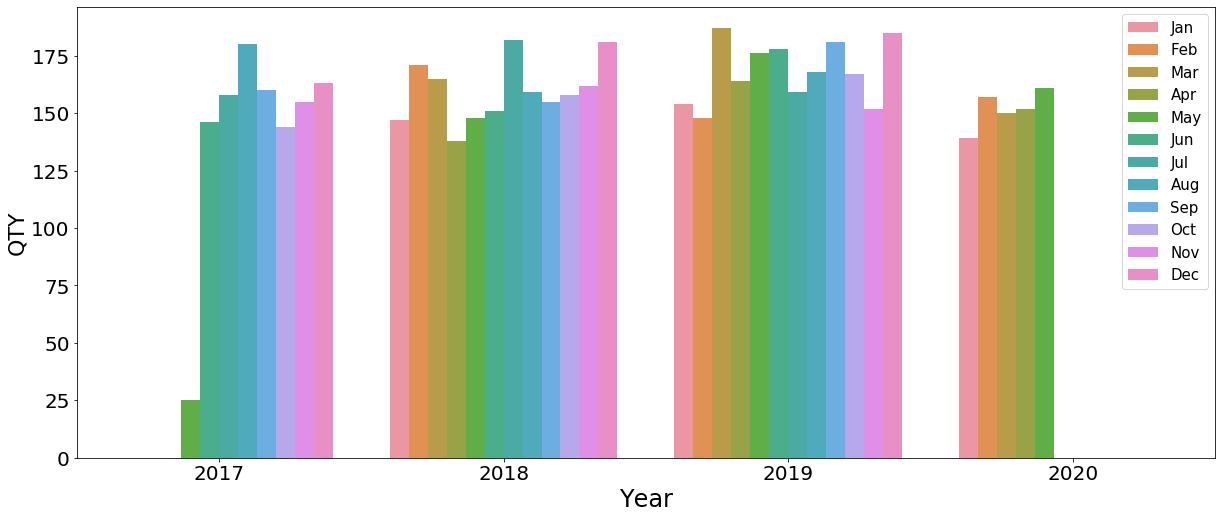

In [45]:
fig_dims = (20.4, 8.3)
fig, ax = plt.subplots(figsize=fig_dims)
b=sns.barplot(x="year", y="qty", hue="Month_Abrev", data=sales_by_MonthYear)
plt.legend(loc='upper right',fontsize='15')
b.set_xlabel("Year",fontsize=24)
b.set_ylabel("QTY",fontsize=22)
b.tick_params(labelsize=20) # Increase (2018,2019...) size

plt.savefig('Barplot_sales.png')

`sq="
CREATE TEMPORARY TABLE month_count(month INT);
SELECT extract(year from purchase_date) as year, extract(month from purchase_date) as month, count(*) FROM staging_fake_cpu_purchases GROUP BY year, month
, 'SELECT * FROM month_count') AS (year int,
jan int, feb int, mar int, apr int, may int, jun int, jul int, aug int, sep int, oct int, nov int, dec int
) ORDER BY YEAR"`

In [41]:
# sql="SELECT * FROM crosstab('SELECT extract(year from purchase_date) as year, extract(month from purchase_date) as month, count(*) FROM staging_fake_cpu_purchases GROUP BY year, month','SELECT * FROM staging_fake_cpu_purchases''SELECT * FROM staging_fake_cpu_purchases') AS (year int, Jan int, Feb int, Mar int, Apr int, May int,Jun int, Jul int, Aug int, Sep int, Oct int, Nov int, Dec int) ORDER BY YEAR; "

# cur.execute(sql)
# cur.fetchall(sql)


# #         'SELECT * FROM month_count'

# Citations:

# ◔̯◔

https://www.enterprisedb.com/postgres-tutorials/how-run-hierarchical-queries-oracle-and-postgresql

https://www.dezyre.com/recipes/generate-grouped-bar-plot-in-python

https://stackoverflow.com/questions/36220829/fine-control-over-the-font-size-in-seaborn-plots-for-academic-papers

https://dba.stackexchange.com/questions/84305/function-extract-from-date-returns-double-precision-value